**Вадим Идиятов 09-011**

# Выявление аномальных наблюдений во временных рядах методом Ирвина

# 1 Вычисление критерия Ирвина

Ход вычислений:

1. Вычислить среднее значение:
$$
\bar{y} = \frac{1}{n} \sum_{t = 0}^{n} y_t
$$
2. Вычислить несмещенную оценку дисперсии:
$$
D_y = \frac{1}{n - 1} \sum_{t = 1}^{n} (y_t - \bar{y})^2
$$
3. Вычислить среднеквадратическое отклонение:
$$
S_y = \sqrt{D_y}
$$
4. Заполнить список критериев Ирвина, вычисляемых по формуле:
$$
{\lambda}_t = \frac{|y_t - y_{t-1}|}{S_y}
$$

In [2]:
from math import sqrt


def irwin_criteria(series):
    """Calculate Irwin criteria for series.
    """
    n = len(series)

    avg = sum(series) / n
    unbiased_variance = sum([(y_t - avg) ** 2 for y_t in series]) / (n - 1)
    standard_deviation = sqrt(unbiased_variance)
    
    criteria = [None]
    for i in range(1, n):
        criterion = abs(series[i] - series[i - 1]) / standard_deviation
        criteria.append(criterion)
        
    return criteria

# 2 Выбор критического значения критерия Ирвина

В данной функции на основании количества наблюдений $n$ и уровня значимости $q$ из таблицы выбирается критериальное значение.

In [3]:
def irwin_critical_value(size, q = 0.05):
    """Calculate irwin critical value for a specific size.
    
    `q` - significance test. Must be 0.01 or 0.05.
    """
    critical_table_05 = {
        2: 2.8,
        3: 2.2,
        10: 1.5,
        20: 1.3,
        30: 1.2,
        50: 1.1,
        100: 1.0,
        400: 0.9,
        1000: 0.8
    }
    critical_table_01 = {
        2: 3.7,
        3: 2.9,
        10: 2.0,
        20: 1.8,
        30: 1.7,
        50: 1.6,
        100: 1.5,
        400: 1.3,
        1000: 1.2
    }

    critical_table = critical_table_05
    if q == 0.01:
        critical_table = critical_table_01

    critical_table_sizes = list(critical_table)
    for i in range(len(critical_table_sizes) - 1):
        if critical_table_sizes[i] <= size < critical_table_sizes[i + 1]:
            return critical_table[critical_table_sizes[i]]
    
    return critical_table[1000]

# 3 Выявление аномалий на основе критериев Ирвина

В функции сравниваются критерии Ирвина для каждого элемента $y_t$ из ряда с критическим значением.

In [4]:
def detect_anomalies(series, *, q = 0.05):
    n = len(series)

    critical_value = irwin_critical_value(n, q)
    criteria = irwin_criteria(series)

    anomalies = [None]
    for i in range(1, n):
        if (criteria[i] > critical_value):
            anomalies.append(True)
        else:
            anomalies.append(False)
    
    return anomalies

# 4 Выявление и исключений аномалий краткосрочных экономических показателей РФ

В демонстрации считываются данные из таблицы Excel, строится график начального временного ряда, выявляются и исключаются аномалии, строится график сглаженного временного ряда.

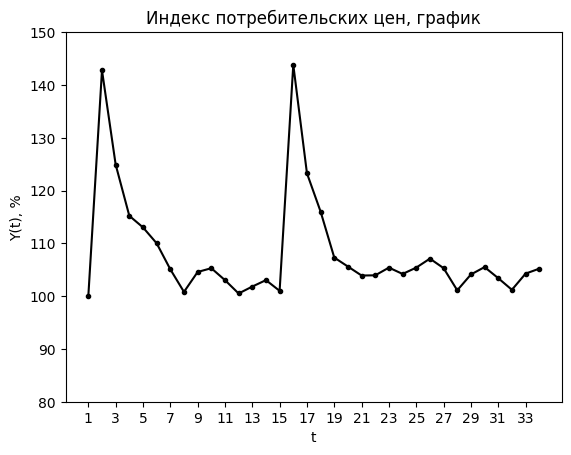

   Квартал   Год   t    Y(t)         λ Аномалия
0       IV  1994   1  100.00       NaN     None
1        I  1995   2  142.77  4.028489     True
2       II  1995   3  124.92  1.681284     True
3      III  1995   4  115.21  0.914581    False
4       IV  1995   5  113.02  0.206275    False
5        I  1996   6  110.01  0.283511    False
6       II  1996   7  105.08  0.464355    False
7      III  1996   8  100.80  0.403131    False
8       IV  1996   9  104.57  0.355095    False
9        I  1997  10  105.29  0.067817    False
10      II  1997  11  103.03  0.212868    False
11     III  1997  12  100.50  0.238300    False
12      IV  1997  13  101.81  0.123388    False
13       I  1998  14  103.03  0.114911    False
14      II  1998  15  101.00  0.191205    False
15     III  1998  16  143.81  4.032256     True
16      IV  1998  17  123.27  1.934654     True
17       I  1999  18  116.00  0.684758    False
18      II  1999  19  107.30  0.819449    False
19     III  1999  20  105.60  0.160122  

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


price_indices_data = pd.read_excel("data/economical_statistics_Russia.xlsx", sheet_name="Sheet1")

year_quarter_numbers = price_indices_data["t"]
indices = price_indices_data["Y(t)"]

plt.plot(year_quarter_numbers, indices, 'k-', year_quarter_numbers, indices, 'k.')
plt.title('Индекс потребительских цен, график')
plt.ylabel('Y(t), %')
plt.xlabel('t')
plt.xticks(range(1, 35, 2))
plt.yticks(range(80, 160, 10))
plt.show()

price_indices_data["λ"] = irwin_criteria(indices)
price_indices_data["Аномалия"] = detect_anomalies(indices, q = 0.05)

print(price_indices_data)

## 6 Выявление и исключение аномалий в статистике урожайности с 1964-го по 1972-ой года

В демонстрации считываются данные из таблицы Excel, строится график начального временного ряда, выявляются и исключаются аномалии, строится график сглаженного временного ряда.

Также для элементов временного ряда по приведенным ниже формулам находятся следующие величины:
- Среднее значение $\bar{y} = \frac{1}{n} \sum_{t = 1}^{n} y_t$
- Дисперсия $D_{y, n} = \frac{1}{n} \sum_{t = 1}^{n} (y_t - \bar{y})^2$
- Несмещенная дисперсия $D_{y} = \frac{1}{n - 1} \sum_{t = 1}^{n} (y_t - \bar{y})^2$

и сравниваются с значениями, полученными с помощью встроенных в модуль `statistics` функций.

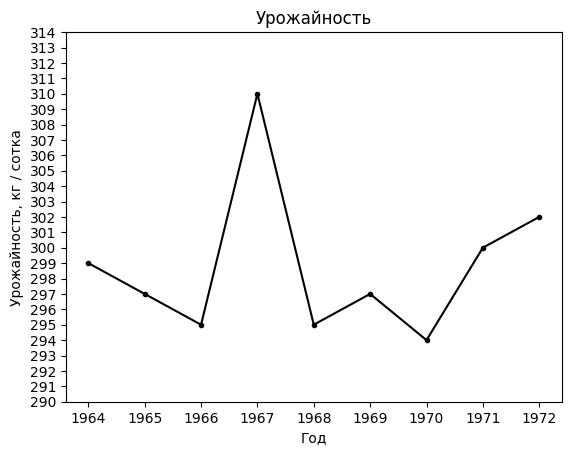

Среднее: 298.7778 | Среднее (из импортированной функции): 298.7778
Дисперсия: 21.7284 | Дисперсия (из импортированной функции): 21.7284
Несмещенная дисперсия: 24.4444 | Несмещенная дисперсия (из импортированной функции): 24.4444
    Год  Урожайность, кг/сотка         λ Аномалия
0  1964                    299       NaN     None
1  1965                    297  0.404520    False
2  1966                    295  0.404520    False
3  1967                    310  3.033899     True
4  1968                    295  3.033899     True
5  1969                    297  0.404520    False
6  1970                    294  0.606780    False
7  1971                    300  1.213560    False
8  1972                    302  0.404520    False


In [9]:
from statistics import mean, pvariance, variance
import pandas as pd
import matplotlib.pyplot as plt


year_yield_data = pd.read_excel("data/yield_statistics.xlsx", sheet_name="Sheet1")

years = year_yield_data["Год"]
yields = year_yield_data["Урожайность, кг/сотка"]

plt.plot(years, yields, 'k-', years, yields, 'k.')
plt.title('Урожайность')
plt.ylabel('Урожайность, кг / сотка')
plt.xlabel('Год')
plt.xticks(range(1964, 1973, 1))
plt.yticks(range(290, 315, 1))
plt.show()

n = len(yields)
avg = sum(yields) / n
print('Среднее:', round(avg, 4), '| Среднее (из импортированной функции):', round(mean(yields), 4))
var = sum([y_t**2 for y_t in yields]) / n - avg**2
print('Дисперсия:', round(var, 4), '| Дисперсия (из импортированной функции):', round(pvariance(yields), 4))
unbiased_var = sum([(y_t - avg) ** 2 for y_t in yields]) / (n - 1)
print('Несмещенная дисперсия:', round(unbiased_var, 4), '| Несмещенная дисперсия (из импортированной функции):', round(variance(yields), 4))

year_yield_data['λ'] = irwin_criteria(yields)
year_yield_data['Аномалия'] = detect_anomalies(yields, q = 0.01)

print(year_yield_data)